In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

<b>Data Import and Cleaning</b>

In [3]:
data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin-1')
df = pd.DataFrame(data)

In [4]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4222 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [10]:
df.isnull().sum()*100/4998 

Date                      0.000000
Time                     30.252101
Location                  0.080032
Operator                  0.200080
Flight #                 73.409364
Route                    15.526210
AC Type                   0.300120
Registration              5.482193
cn/ln                    13.365346
Aboard                    0.360144
Aboard Passangers         4.581833
Aboard Crew               4.521809
Fatalities                0.160064
Fatalities Passangers     4.841937
Fatalities Crew           4.821929
Ground                    0.840336
Summary                   1.280512
dtype: float64

In [14]:
df.drop('Flight #', axis=1, inplace=True)

In [19]:
df.drop('Time', axis=1, inplace=True)

In [31]:
route_mode = df['Route'].mode()
#df['Route'] = df['Route'].fillna(route_mode)
def replace_route(value):
  if type(value) != str:
    return route_mode
  else:
    return value

df['Route'] = df['Route'].map(replace_route)

cnln_mode = df['cn/ln'].mode()
def replace_cnln(value):
  if type(value) != str:
    return cnln_mode
  else:
    return value

df['cn/ln'] = df['cn/ln'].map(replace_cnln)

registration_mode = df['Registration'].mode()
def replace_registratio(value):
  if type(value) != str:
    return registration_mode
  else:
    return value

df['Registration'] = df['Registration'].map(replace_registratio)

In [32]:
df.isnull().sum()*100/4998 

Date                     0.000000
Location                 0.080032
Operator                 0.200080
Route                    0.000000
AC Type                  0.300120
Registration             0.000000
cn/ln                    0.000000
Aboard                   0.360144
Aboard Passangers        4.581833
Aboard Crew              4.521809
Fatalities               0.160064
Fatalities Passangers    4.841937
Fatalities Crew          4.821929
Ground                   0.840336
Summary                  1.280512
dtype: float64

<b>Exploratory Data Analysis:</b>

In [37]:
crashes = len(df)
fatalities = df['Fatalities'].sum()
aboard = df['Aboard'].sum()
survival_rate = (aboard-fatalities)*100/aboard

print(f"There are {crashes} crashes recorded. {aboard} persons involved with {fatalities} fatalities. Survival rate: {survival_rate}")

There are 4998 crashes recorded. 155356.0 persons involved with 111644.0 fatalities. Survival rate: 28.136666752491053


In [49]:
df['Year'] = df['Date'].str[-4:]

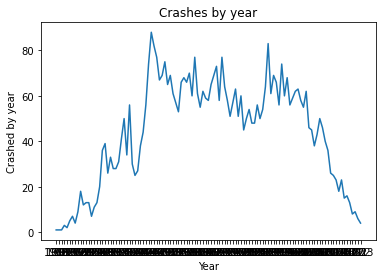

<Figure size 864x432 with 0 Axes>

In [58]:
df_by_year = df.groupby('Year').size().reset_index(name='Crashed by year')
#df_by_year

fig, ax = plt.subplots()
plt.figure(figsize=(12, 6))
ax.plot(df_by_year['Year'], df_by_year['Crashed by year'])

ax.set_title('Crashes by year')
ax.set_xlabel('Year')
ax.set_ylabel('Crashed by year')

plt.show()

<AxesSubplot:xlabel='Year', ylabel='Crashed by year'>

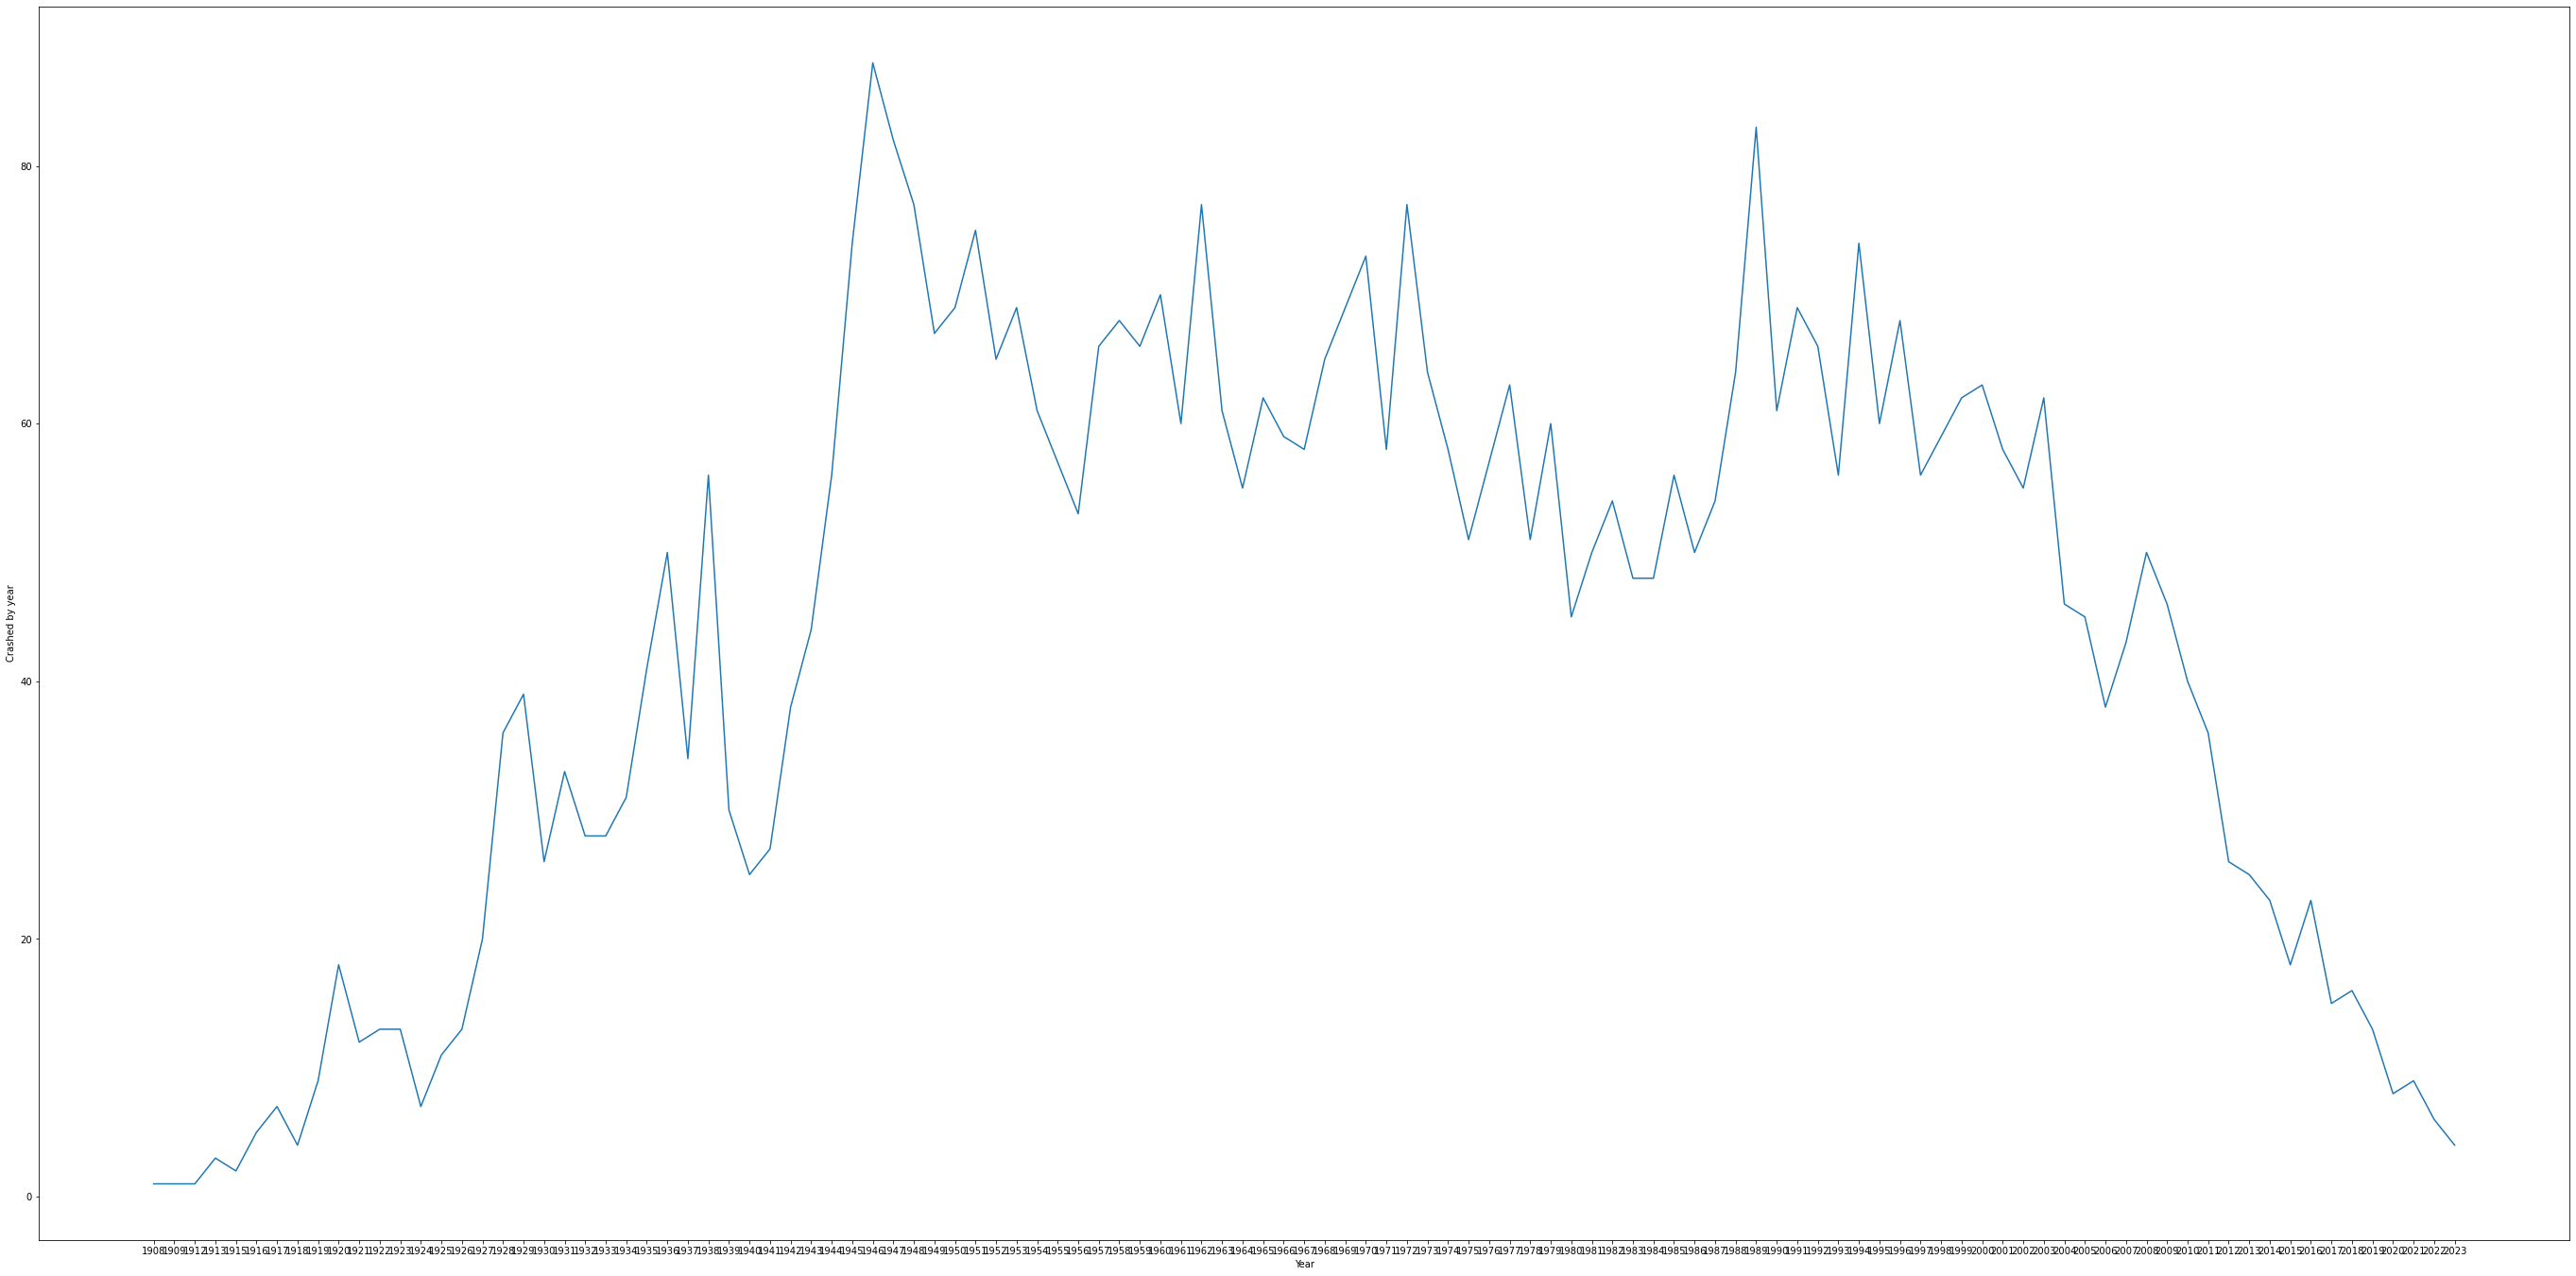

In [62]:
fig, ax = plt.subplots(figsize=(48, 24))

sns.lineplot(
    x = "Year", 
    y = "Crashed by year",  
    data = df_by_year,         
    ax=ax
)

<b>Statistical Analysis:</b>

In [73]:
mean = stats.tmean(df['Fatalities'].dropna())
median = np.median(df['Fatalities'].dropna()) 
variance = stats.tvar(df['Fatalities'].dropna())
std = stats.tstd(df['Fatalities'].dropna())

print(mean)
print(median)
print(variance)
print(std)

22.37354709418838
11.0
1229.3256580910868
35.06174065974316


In [88]:
def get_country(location):
    return location.split(',')[-1].strip()

df['Location'] = df['Location'].astype(str)
df['Region'] = df['Location'].map(get_country)

In [94]:
brazil = df[df['Region'] == 'Brazil']['Fatalities']
russia = df[df['Region'] == 'Russia']['Fatalities']

In [95]:
t_statistic, p_value = stats.ttest_ind(brazil, russia)
print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-statistic: -4.545385246000121
p-value: 7.12852737043103e-06


In [96]:
if p_value < 0.05:
  print("Reject the null hypothesis. There is a statistically significant difference between the means of the two datasets.")
else:
  print("Fail to reject the null hypothesis. There is not enough evidence to conclude a statistically significant difference between the means.")

Reject the null hypothesis. There is a statistically significant difference between the means of the two datasets.


<b>Visualization:</b>

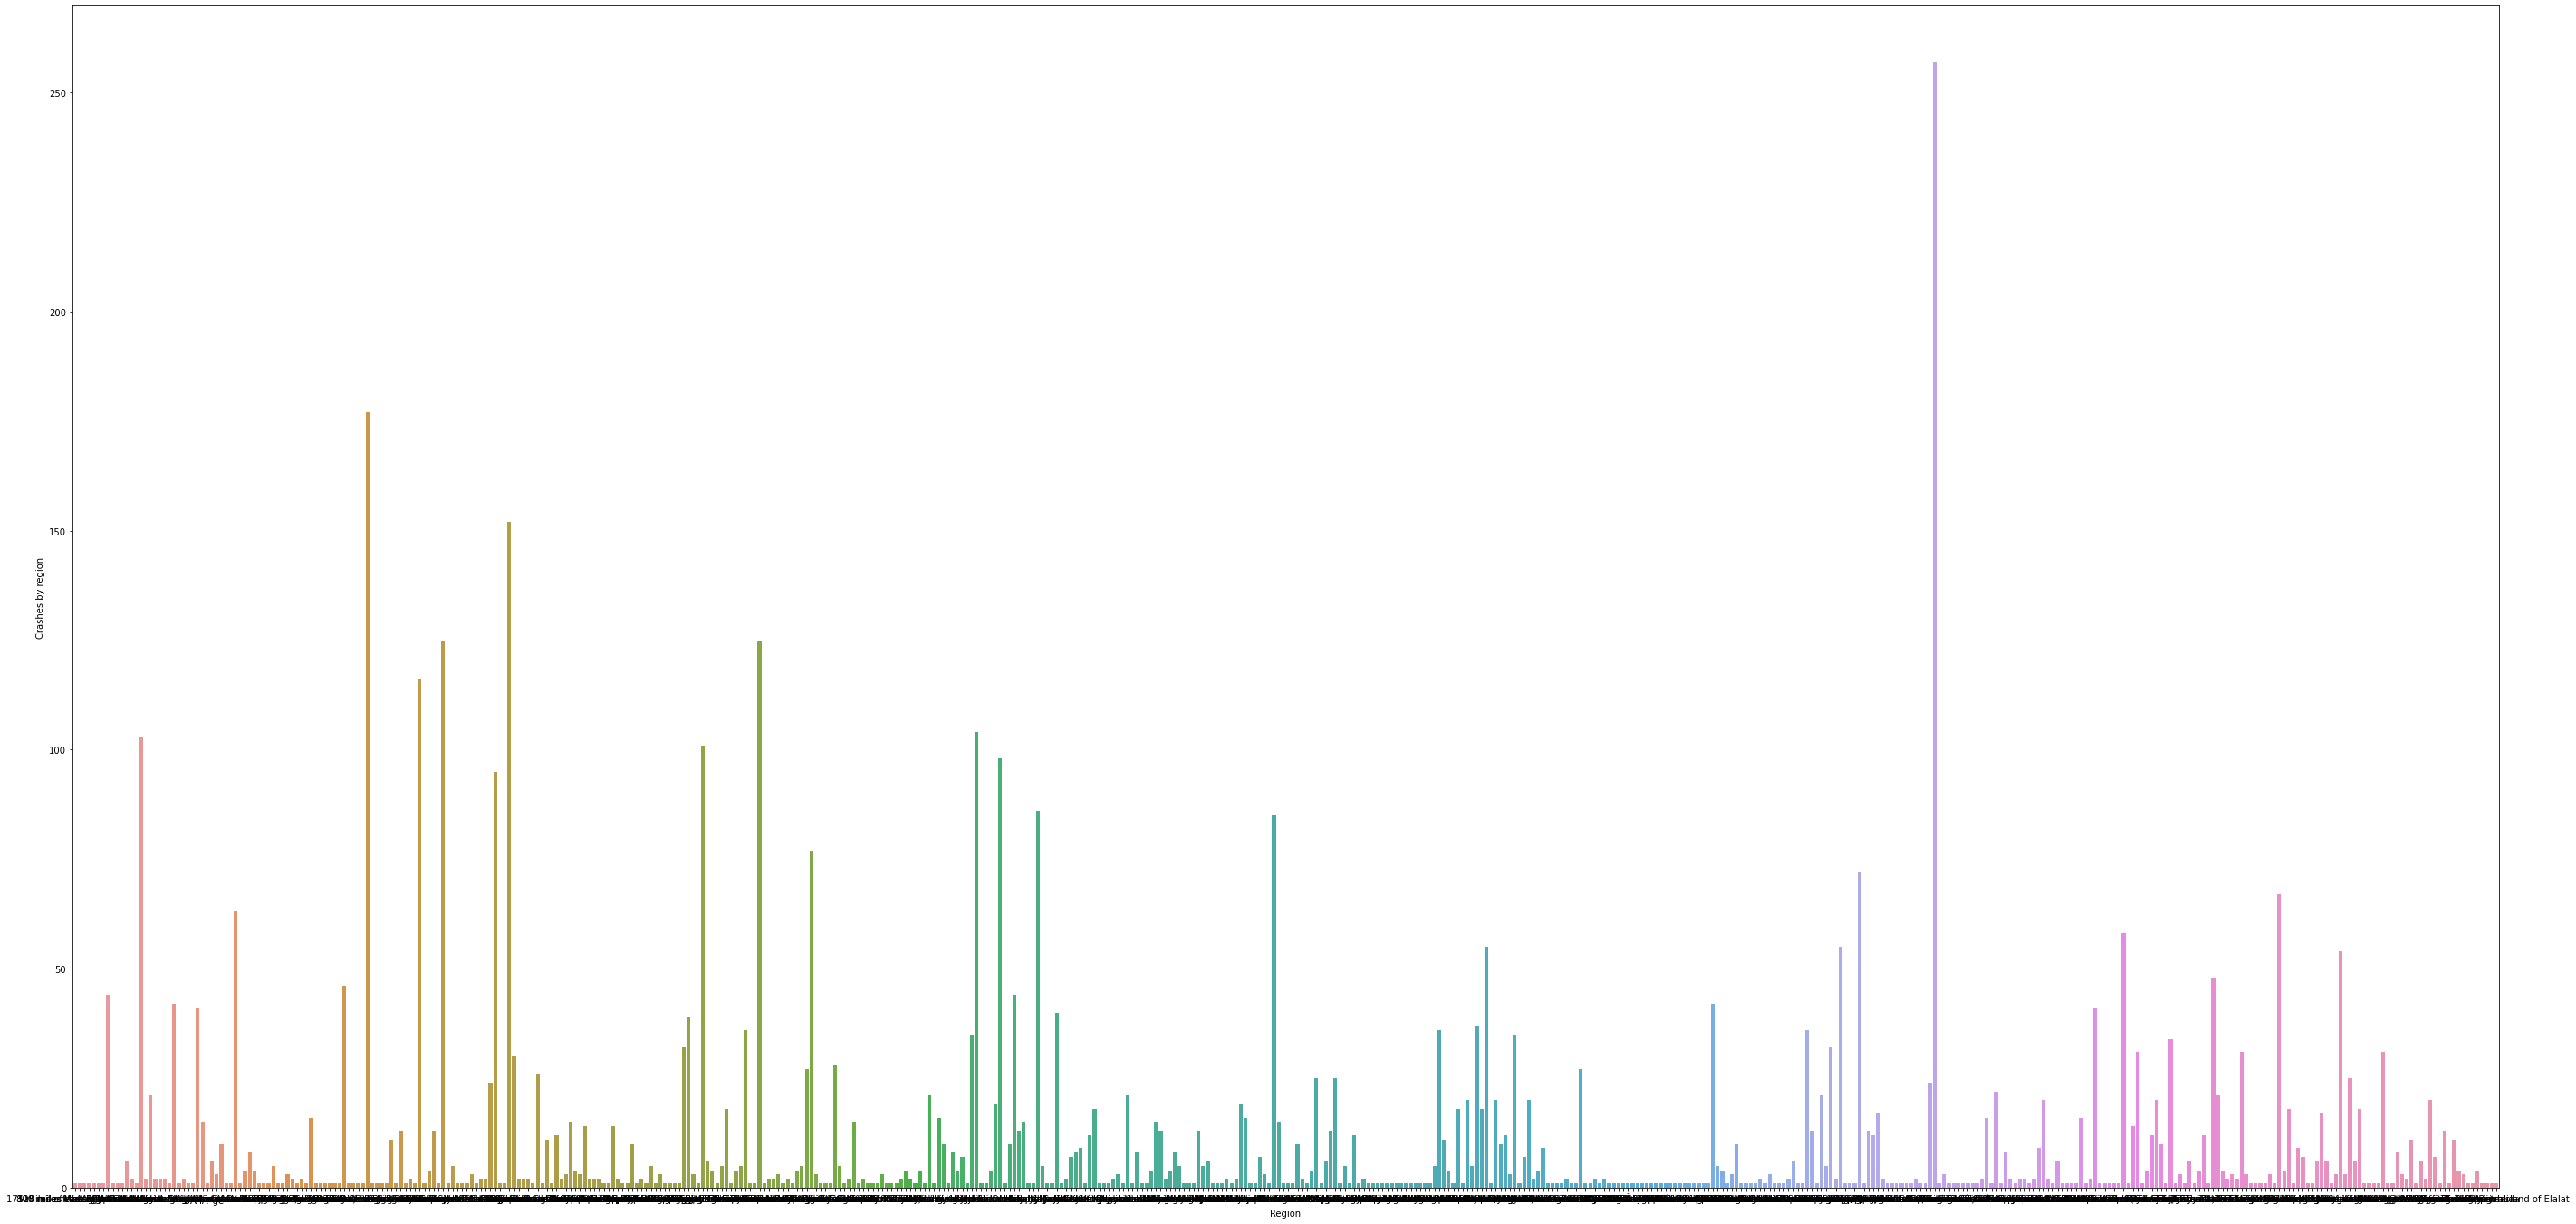

In [99]:
df_by_year = df.groupby('Region').size().reset_index(name='Crashes by region')
#df_by_year
fig, ax = plt.subplots(figsize=(48, 24))
sns.barplot(x = "Region", y = "Crashes by region", data = df_by_year, ax=ax)
plt.show()